#Tech-Challenge

##Problema de Negócio

O objetivo é identificar quais são os melhores indicadores para prever os custos médicos individuais cobrados pelo seguro de saúde.

##Base de Dados

Este conjunto de dados consiste nas seguintes características: idade, sexo, IMC, fumante, região e custo médico.

##Desafio

Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

#Aplicação do Modelo de Regressão Multipla

###Importação dos dados
Aqui os dados que serão usados como base do problema são importados.

### Biblioteca Utilizada

In [297]:
# ! pip install pandas

import pandas as pd
# Carregamento do banco de dados 
dados = pd.read_csv("custos_medicos.csv")
dados.head(290)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
285,46,male,26.620,1,no,southeast,7742.10980
286,46,female,48.070,2,no,northeast,9432.92530
287,63,female,26.220,0,no,northwest,14256.19280
288,59,female,36.765,1,yes,northeast,47896.79135


###Exploração da base de dados
Nesse bloco, iremos explorar a base de dados e suas características.

In [298]:
dados.shape

(1336, 7)

In [299]:
set(dados.charges)

{40974.1649,
 8211.1002,
 32787.45859,
 24603.04837,
 8219.2039,
 16420.49455,
 8232.6388,
 8233.0975,
 8240.5896,
 8252.2843,
 16450.8947,
 16455.70785,
 41034.2214,
 8269.044,
 8277.523,
 8280.6227,
 24667.419,
 8283.6807,
 24671.66334,
 8302.53565,
 8310.83915,
 41097.16175,
 8334.45755,
 8334.5896,
 8342.90875,
 8347.1643,
 16577.7795,
 16586.49771,
 8410.04685,
 8413.46305,
 8428.0693,
 8442.667,
 8444.474,
 8457.818,
 16657.71745,
 24869.8368,
 24873.3849,
 8515.7587,
 8516.829,
 8520.026,
 8522.003,
 8527.532,
 24915.04626,
 24915.22085,
 8534.6718,
 8538.28845,
 8539.671,
 8547.6913,
 8551.347,
 8556.907,
 8569.8618,
 8582.3023,
 16776.30405,
 8596.8278,
 8601.3293,
 8603.8234,
 8604.48365,
 16796.41194,
 8606.2174,
 8605.3615,
 8615.3,
 49577.6624,
 8627.5411,
 8671.19125,
 8688.85885,
 16884.924,
 25081.76784,
 8703.456,
 33307.5508,
 8733.22925,
 8765.249,
 8782.469,
 8798.593,
 8823.279,
 8823.98575,
 8825.086,
 8827.2099,
 8835.26495,
 17043.3414,
 8871.1517,
 17081.08,
 8

**Interferência sobre a base de dados:**

Variável Target: No nosso case, a target é a coluna "charges".

**Análise exploratória dos dados**

Conhecer os dados, identificar padrões, encontrar anomalias, etc.


In [300]:
# Estatísticas descritivas
dados.describe()

,age,bmi,children,charges
count,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.238024,30.646635,1.096557,13288.190094
std,14.037572,6.071674,1.205650,12110.352288
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.272500,0.000000,4746.875675
50%,39.000000,30.380000,1.000000,9388.753650
75%,51.000000,34.681250,2.000000,16687.364100
max,64.000000,52.580000,5.000000,63770.428010


### Análise Descritiva


In [301]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1336 non-null   int64  
 1   sex       1336 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1336 non-null   int64  
 4   smoker    1336 non-null   object 
 5   region    1336 non-null   object 
 6   charges   1336 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### Análise univariada

Analisando a Distribuição de Variáveis Numéricas:


Vamos analisar e compreender a distribuição dos dados para cada métrica de pontuação de seguro de saude. Será que temos outliers na base?

<Axes: xlabel='age'>

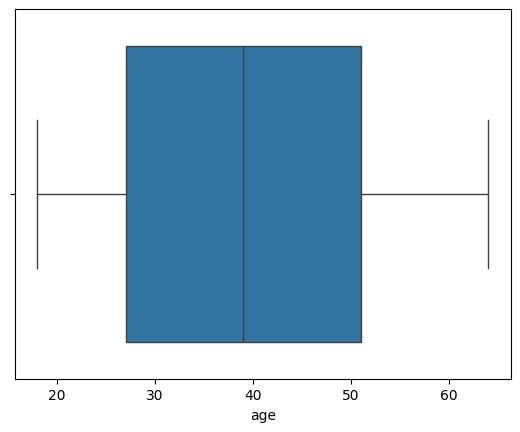

In [302]:
import seaborn as sb
import matplotlib.pylab as plt

sb.boxplot(x=dados["age"])

In [303]:
print(dados['age'].min())
print(dados['age'].max())

18
64


<Axes: xlabel='age', ylabel='Count'>

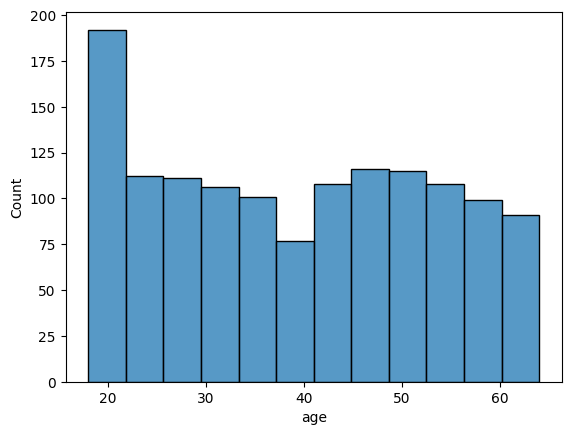

In [304]:
sb.histplot(data=dados, x="age")

<Axes: xlabel='bmi', ylabel='Count'>

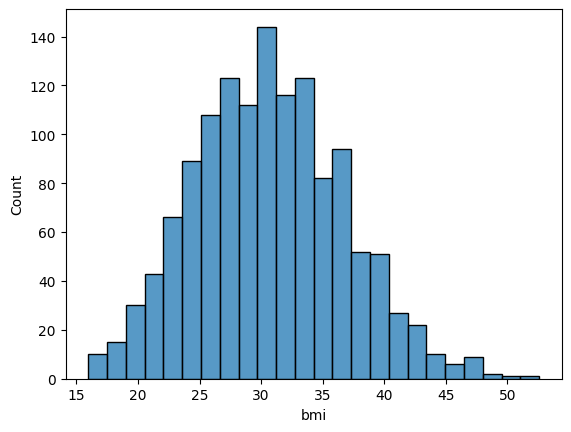

In [305]:
sb.histplot(data=dados, x="bmi")

<Axes: xlabel='bmi'>

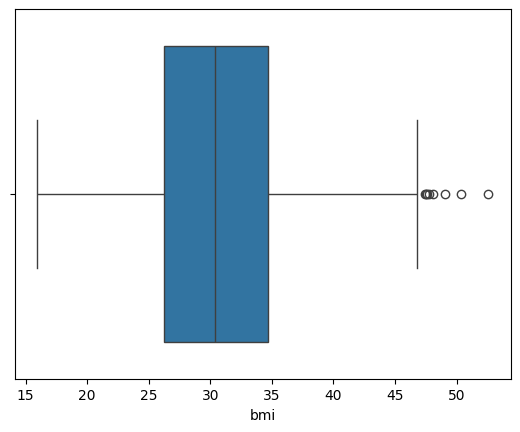

In [306]:
sb.boxplot(x=dados["bmi"])

<Axes: xlabel='smoker'>

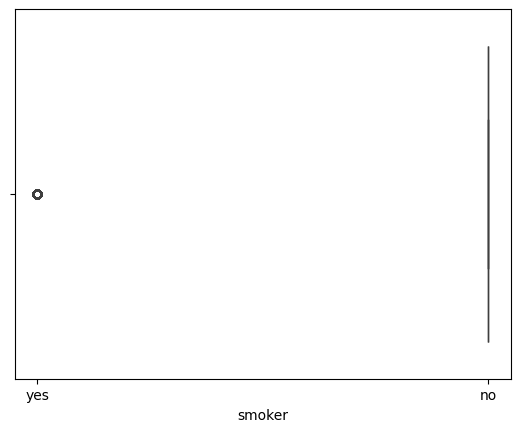

In [307]:
sb.boxplot(x=dados["smoker"])

<Axes: xlabel='smoker', ylabel='Count'>

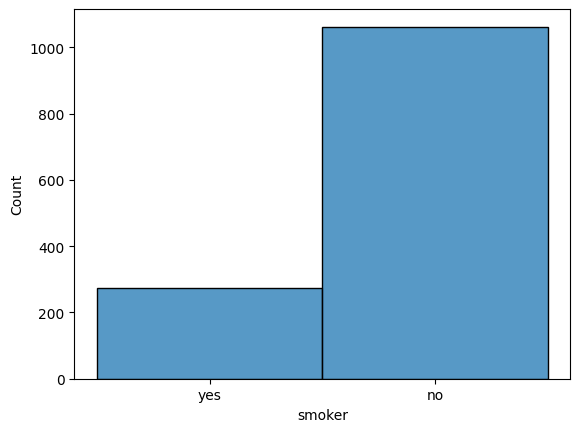

In [308]:
sb.histplot(data=dados, x="smoker")

<Axes: xlabel='charges'>

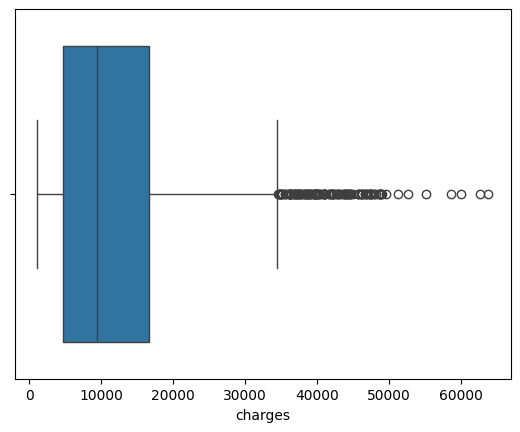

In [309]:
sb.boxplot(x=dados["charges"])

<Axes: xlabel='charges', ylabel='Count'>

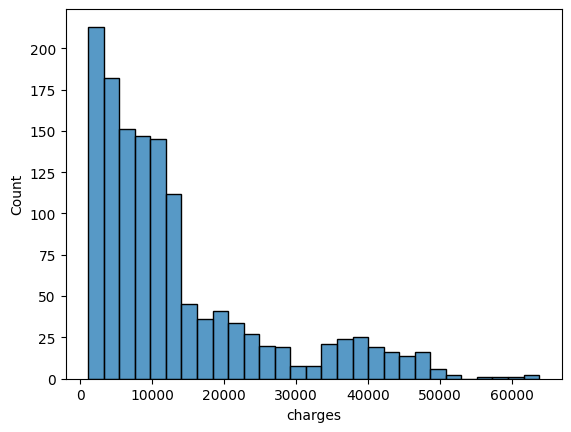

In [310]:
sb.histplot(data=dados, x="charges")

### Analise de correlação

1. Aplicação do Label Encoder para converter todos os atributos não-numérico para o numéricos

In [311]:
from sklearn.preprocessing import LabelEncoder
# Inicializa o LabelEncoder
label_encoder = LabelEncoder()

# Lista das colunas a serem transformadas
columns = ['sex', 'smoker', 'region']
# Aplica o LabelEncoder a cada coluna na lista
for col in columns:
    dados[col] = label_encoder.fit_transform(dados[col])

# Verificação dos dados, já com as colunas transformadas
dados.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


2. Realizando a analise de correlação entre os campos usando a matriz de correlação

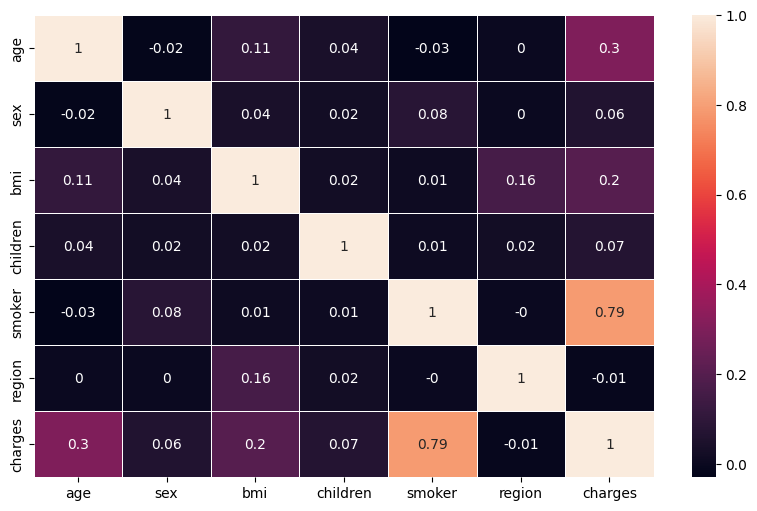

In [312]:
# # ! pip install matplotlib

import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Supondo que 'dados' seja seu DataFrame
# Filtrar colunas numéricas

numeric_dados = dados.select_dtypes('number')
# Calcular a matriz de correlação
correlation_matrix = numeric_dados.corr().round(2)
# arrendondo os valores das correlacoes
fig, ax = plt.subplots(figsize=(10, 6))
sb.heatmap(data= correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

### Normalização dos dados

A função a seguir aplica o **MinMaxScaler**, que normaliza os dados para o intervalo entre **0 e 1**. Esta classe será usada no pipeline de tratamento de dados, garantindo consistência e melhor performance dos modelos de aprendizado de máquina.

In [313]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

class CustomMinMaxScaler(BaseEstimator, TransformerMixin):
    """
    Classe personalizada para normalizar dados de treino e teste separadamente.

    Atributos:
        scaler_treino: Objeto MinMaxScaler ajustado aos dados de treino.
        scaler_teste: Objeto MinMaxScaler ajustado aos dados de teste.

    Métodos:
        fit(X_treino): Ajusta o scaler de treino.
        transform(X): Aplica o scaling aos dados de treino ou teste.
        inverse_transform(X): Aplica o inverse scaling aos dados escalados.
    """

    def __init__(self, columns):
        """
        Inicializa a instância da classe.

        Parâmetros:
            columns: Lista de nomes de colunas a serem escalonadas.
        """
        self.columns = columns
        self.scaler_treino = MinMaxScaler()
        self.scaler_teste = MinMaxScaler()

    def fit(self, X_treino):
        """
        Ajusta o scaler de treino aos dados de treino.

        Parâmetros:
            X_treino: Matriz NumPy contendo os dados de treino.

        Retorno:
            Objeto CustomMinMaxScaler.
        """
        self.scaler_treino.fit(X_treino[self.columns])
        return self

    def transform(self, X):
        """
        Aplica o scaling aos dados de treino ou teste.

        Parâmetros:
            X: Matriz NumPy contendo os dados a serem escalados.

        Retorno:
            Matriz NumPy contendo os dados escalados.
        """
        if X.shape[1] == len(self.columns):
            # Dados de treino
            return self.scaler_treino.transform(X[self.columns])
        else:
            # Dados de teste
            return self.scaler_teste.transform(X[self.columns])

    def inverse_transform(self, X):
        """
        Aplica o inverse scaling aos dados escalados.

        Parâmetros:
            X: Matriz NumPy contendo os dados escalados.

        Retorno:
            Matriz NumPy contendo os dados originais.
        """
        if X.shape[1] == len(self.columns):
            # Dados de treino
            return self.scaler_treino.inverse_transform(X[self.columns])
        else:
            # Dados de teste
            return self.scaler_teste.transform(X[self.columns])


### Separação da Base em Treino e Teste

Nesta etapa, as bases de treino e teste são separadas antes da normalização ser aplicada. Essa abordagem garante que os dados de treino não influenciem os dados de teste, prevenindo possíveis vieses nos resultados do modelo.

In [314]:
from sklearn.model_selection import train_test_split

In [315]:
X = dados[['age', 'sex', 'bmi', 'children', 'smoker', 'region']] # variaveis independentes
y = dados['charges'] #target

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [317]:
X_train.shape

(895, 6)

In [318]:
X_test.shape

(441, 6)

### Pipeline de Tratamento de Dados

Agora vamos integrar todos os processos de tratamento de dados necessários nas bases de treino e teste em nossa pipeline.

In [319]:
from sklearn.pipeline import Pipeline

# Crie uma única instância do scaler
scaler = CustomMinMaxScaler(columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

def pipeline_treino(df):
  pipeline = Pipeline([('min_max', scaler)])
  df_pipeline = pipeline.fit_transform(df)

  # Converta o resultado para DataFrame
  df_pipeline_train = pd.DataFrame(df_pipeline, columns=df.columns)
  return df_pipeline_train


def pipeline_teste(df):
  pipeline = Pipeline([('min_max', scaler)])
  df_pipeline = pipeline.transform(df)

  # Converta o resultado para DataFrame
  df_pipeline_test = pd.DataFrame(df_pipeline, columns=df.columns)
  return df_pipeline_test


In [320]:
# Utilize as pipelines para normalizar os dados de treino e teste
train = pipeline_treino(X_train)
test =  pipeline_teste(X_test)

In [331]:
# Dados de treino, antes da normalização
X_train

,age,sex,bmi,children,smoker,region
680,19,1,20.30,0,0,3
1035,22,1,37.07,2,1,2
467,56,0,33.82,2,0,1
39,60,1,39.90,0,1,3
30,22,1,35.60,0,1,3
...,...,...,...,...,...,...
1095,51,0,34.96,2,1,0
1130,27,1,45.90,2,0,3
1294,20,1,22.00,1,0,3
860,38,0,28.00,3,0,3


In [330]:
# Dados de treino já normalizados
train


,age,sex,bmi,children,smoker,region
0,0.021739,1.0,0.126089,0.0,0.0,1.000000
1,0.086957,1.0,0.613306,0.4,1.0,0.666667
2,0.826087,0.0,0.518884,0.4,0.0,0.333333
3,0.913043,1.0,0.695526,0.0,1.0,1.000000
4,0.086957,1.0,0.570598,0.0,1.0,1.000000
...,...,...,...,...,...,...
890,0.717391,0.0,0.552005,0.4,1.0,0.000000
891,0.195652,1.0,0.869843,0.4,0.0,1.000000
892,0.043478,1.0,0.175479,0.2,0.0,1.000000
893,0.434783,0.0,0.349797,0.6,0.0,1.000000


### Modelo de Regressão Linear

Vamos aplicar o modelo de Regressão Linear, que visa entender o padrão de um valor em função de outro(s) valor(es), encontrando assim uma função que expressa esse padrão. Como estamos lidando com múltiplas variáveis características, utilizaremos o modelo de regressão linear múltipla.

In [328]:
# Importando o LinearRegression, da biblioteca sklearn
from sklearn.linear_model import LinearRegression

# Instanciando o método, para o uso a seguir
lin_reg = LinearRegression()

# Treinando o modelo de Regressão Linear
lin_reg.fit(train, y_train)

LinearRegression()

Nesta etapa, faremos a validação da eficácia do modelo, utilizando a métrica de p-value.

In [327]:
import pandas as pd
import statsmodels.api as sm

# Adicionar uma constante ao modelo (intercepto)
X_train_sm = sm.add_constant(X_train)

# Ajustar o modelo de regressão linear usando statsmodels
modelo_sm = sm.OLS(y_train, X_train_sm).fit()

# P-values do modelo
print("P-values do modelo:")
print(modelo_sm.pvalues)

P-values do modelo:
const        2.908702e-20
age          2.191293e-60
sex          7.450377e-01
bmi          6.075432e-18
children     1.470794e-02
smoker      2.004333e-233
region       6.407211e-02
dtype: float64


In [329]:
# Consultando o sumário da validação
print("Sumário, com mais resultados:")
print(modelo_sm.summary())

Sumário, com mais resultados:
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     412.5
Date:                Thu, 23 May 2024   Prob (F-statistic):          9.11e-253
Time:                        15:59:41   Log-Likelihood:                -9062.6
No. Observations:                 895   AIC:                         1.814e+04
Df Residuals:                     888   BIC:                         1.817e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.104e+04 


Analisando a validação, através dos intervalos de confiança.

In [326]:
# Intervalos de confiança dos coeficientes do modelo
intervalos_de_confianca = modelo_sm.conf_int()
intervalos_de_confianca.columns = ['2.5%', '97.5%']

print("\nIntervalos de confiança dos coeficientes do modelo:")
print(intervalos_de_confianca)


Intervalos de confiança dos coeficientes do modelo:
                  2.5%         97.5%
const    -13334.475146  -8748.331172
age         229.720466    286.948721
sex        -669.226427    935.135830
bmi         234.036472    368.043969
children     82.053896    750.784436
smoker    22150.906521  24154.525804
region     -712.289357     20.277073
